### 파이썬 머신러닝
## 지도학습
---
# k-NN 분류 (최근접 이웃)

- k-NN 은 대표적인 분류 알고리즘 중의 하나이다.
- k-NN 에서 NN 은 Nearest Neighbors 즉, 가장 가까운 점들이라는 의미이며, k 는 가장 가까운 이웃의 갯수를 의미한다.
- 예측하려고 하는 점 주위에 가장 가까이 있는 점들의 타겟값(클래스) 를 비교하여 해당 클래스를 판정한다.

> 주의 : 가깝다 멀다를 평가하는 지표를 **거리(distance)** 라고 한다. 거리를 어떻게 측정하느냐에 따라 다양한 방식을 적용할 수 있다. 하지만 일반적으로는 좌표상의 거리로 생각하자.

> 참고 : <br>
> scikit-learn 메뉴얼 http://scikit-learn.org/stable/modules/neighbors.html<br>
> wekipedia https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

- k-NN 은 가장 직관적이고 알고리즘이 간단하여 가장 많이 애용되는 분류 알고리즘이다.
- 하지만 전문적으로 들어가면 거리를 측정하는 방식, 점들마다 가중치를 부여하는 방식 등 다양한 옵션을 줄 수 있어 그렇게 간단하지만도 않다.

<img src="ch02_04.jpg" />
<p style="text-align: center;">(출처 : wikipedia)</p>

- 위의 그림을 예로 들어 k-NN 을 설명하겠다.
- 파란색 클래스가 6개, 빨간색 클래스가 5개 있다. 여기서 녹색점의 위치는 빨간색으로 예측해야 할까 아니면 파란색으로 예측해야 할까?
- k=3 인 경우 녹색점에서 가장 가까운 점 3개를 비교한다. 빨간 점이 많으므로 녹색점은 빨간색 클래스로 판정한다.
- k=5 인 경우 가까운 5개의 점 중에서 파란색이 3개로 많으므로 녹색점을 파란색 클래스로 판정한다.

<img src="ch02_06.jpg" />
<p style="text-align: center;">(출처 : wikipedia.org)</p>

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca

### 아이리스 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### k-NN 적용하기

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

model = KNeighborsClassifier() # n_neighbors=5 (기본값)

In [7]:
X_train.shape

(112, 4)

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

- 학습데이터로 평가

In [9]:
pred_y = model.predict(X_train)
display(y_train, pred_y)

array([2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       0, 1])

array([2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       0, 1])

In [10]:
(pred_y == y_train).mean()

0.9732142857142857

- 테스트데이터로 평가

In [11]:
pred_y = model.predict(X_test)
display(y_test, pred_y)

array([1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1])

array([1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1])

In [12]:
(pred_y == y_test).sum() / len(y_test)
(pred_y == y_test).mean()

0.9736842105263158

In [13]:
model.score(X_test, y_test)

0.9736842105263158

In [14]:
# [1,2,1,2] 인 새로운 꽃을 가져왔다. 이 꽃의 품종은?
model.predict([[1,2,1,2]])

array([0])

- 테스트데이터에서 틀린 샘플들을 산점도에 표시해 보자

In [15]:
bad_samples = X_test[y_test != pred_y]
bad_samples

array([[6. , 2.7, 5.1, 1.6]])

In [16]:
y_test[y_test != pred_y]

array([1])

In [17]:
pred_y[y_test != pred_y]

array([2])

Text(0,0.5,'petal length (cm)')

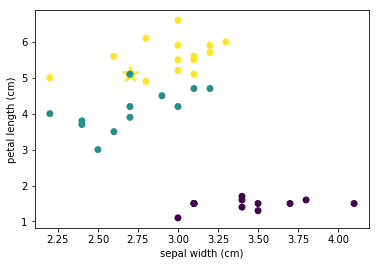

In [18]:
c1 = 1 # 산점도를 그릴 속성1
c2 = 2 # 산점도를 그릴 속성2

bad_samples = X_test[y_test != pred_y]

plt.scatter(bad_samples[:,c1], bad_samples[:,c2], marker='*',
            c=pred_y[y_test != pred_y], s=300, vmin=0, vmax=2) # 틀린애를 별모양으로 그린다

plt.scatter(X_test[:,c1], X_test[:,c2], c=y_test) # 전체 산점도
plt.xlabel(iris.feature_names[c1])
plt.ylabel(iris.feature_names[c2])

- 학습데이터에서 틀린 샘플들을 산점도에 표시해 보자

In [19]:
pred_y = model.predict(X_train)
display(y_train, pred_y)

array([2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       0, 1])

array([2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       0, 1])

In [20]:
bad_samples = X_train[y_train != pred_y]
bad_samples

array([[5.9, 3.2, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 2.5, 4.5, 1.7]])

In [21]:
y_train[y_train != pred_y]

array([1, 1, 2])

In [22]:
pred_y[y_train != pred_y]

array([2, 2, 1])

Text(0,0.5,'sepal width (cm)')

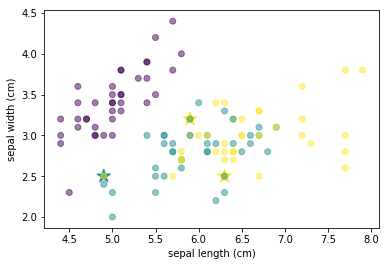

In [23]:
c1 = 0
c2 = 1

plt.scatter(bad_samples[:,c1], bad_samples[:,c2], marker='*',
            c=pred_y[y_train != pred_y], s=200, vmin=0, vmax=2)

plt.scatter(X_train[:,c1], X_train[:,c2], c=y_train, alpha=0.5)
plt.xlabel(iris.feature_names[c1])
plt.ylabel(iris.feature_names[c2])


### 속성을 2개로 제한하기
- 위의 결과는 속성 4개를 모두 사용한 결과이다.
- 속성이 2개 보다 많은 경우에는 수치적으로 해석할 수는 있지만 시각화 하기가 쉽지 않다.
- 시각화를 통해 좀 더 이해를 쉽게 하기 위해 속성을 2개로 제한해서 k-NN 을 적용해 보자.
- 먼저 모든 속성쌍 들에 대한 산점도를 그려보자.

In [24]:
# sepal length 와 petal length 두개의 속성으로 제한하자
iris = load_iris()
X = iris.data[:, [0,2]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # 테스트데이터 분리

In [26]:
model = KNeighborsClassifier(5) # 모델 생성
model.fit(X_train, y_train) # 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
pred_y = model.predict(X_test)
(pred_y==y_test).mean()

0.9473684210526315

Text(0,0.5,'petal length (cm)')

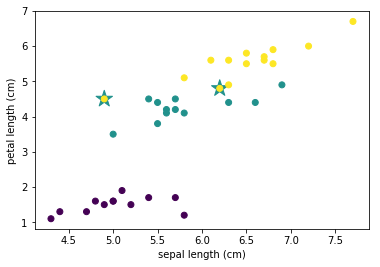

In [30]:
bad_samples = X_test[y_test != pred_y]

plt.scatter(bad_samples[:,0], bad_samples[:,1], marker='*',
            c=pred_y[y_test != pred_y], s=300, vmin=0, vmax=2) # 틀린애를 별모양으로 그린다

plt.scatter(X_test[:,0], X_test[:,1], c=y_test) # 전체 산점도
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

In [37]:
# [6, 4.5]
model.predict([[6,4.84]])

array([2])

- 경계 영역을 표시하기 위해 별도의 모듈을 설치하자.
- Anaconda Prompt 에서 "pip install mglearn" 실행
- "C:\[설치경로]\Anaconda3\Lib\site-packages\mglearn" 에 설치됨
- "import mglearn" 으로 설치 확인

In [38]:
import mglearn

Text(0.5,1,'5-NN (for train data)')

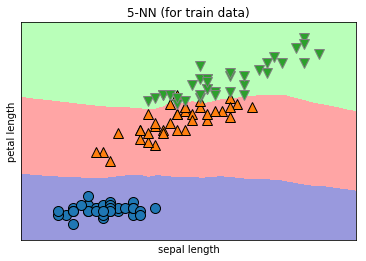

In [41]:
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('5-NN (for train data)')

plt.show()